In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
import numpy as np

In [3]:
# Paleta de cores

AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [4]:
df_medidas = pd.read_csv(
    r'C:\Estudos\alura\data-science\10-dataviz\dados\medidas_sabao_em_po.csv'
)

In [5]:
df_medidas.sample(5)

,comprimento,altura,largura,amostra
852,20.06,14.93,4.92,E
296,19.93,15.07,5.01,B
568,20.00,15.00,4.97,C
839,19.99,15.01,4.99,E
940,20.02,14.98,5.02,E


In [6]:
# df_medidas.describe()

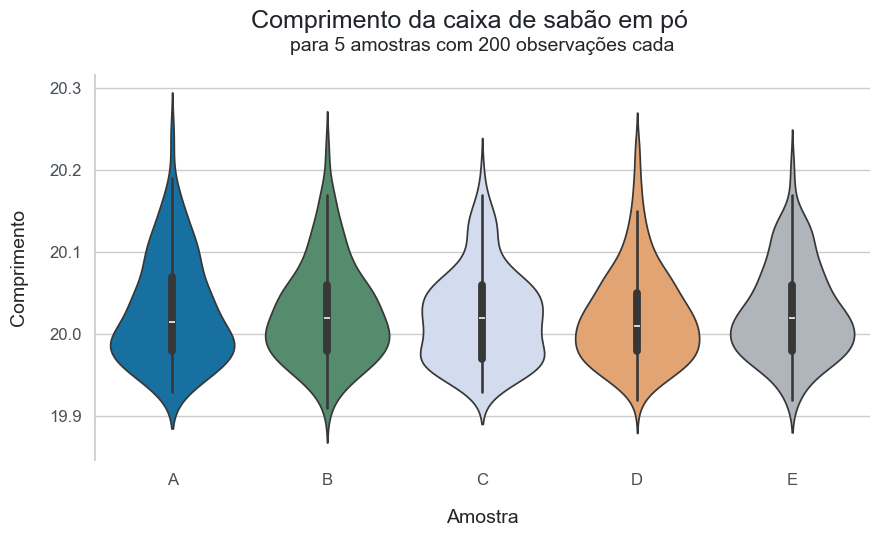

In [7]:
# Violin plot: junção do diagrama de caixa e do histograma

sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.violinplot(data=df_medidas, x='amostra', y='comprimento', hue='amostra',
                    palette=[AZUL2, VERDE1, AZUL5, LARANJA1, CINZA3])

plt.suptitle('Comprimento da caixa de sabão em pó', size=18, color=CINZA1, y=1.01)

plt.title('para 5 amostras com 200 observações cada', size=14, y=1.04)
ax.set_xlabel('Amostra', fontsize=14, labelpad=15)
ax.set_ylabel('Comprimento', fontsize=14, labelpad=15)
ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
sns.despine(bottom=True)

plt.show()

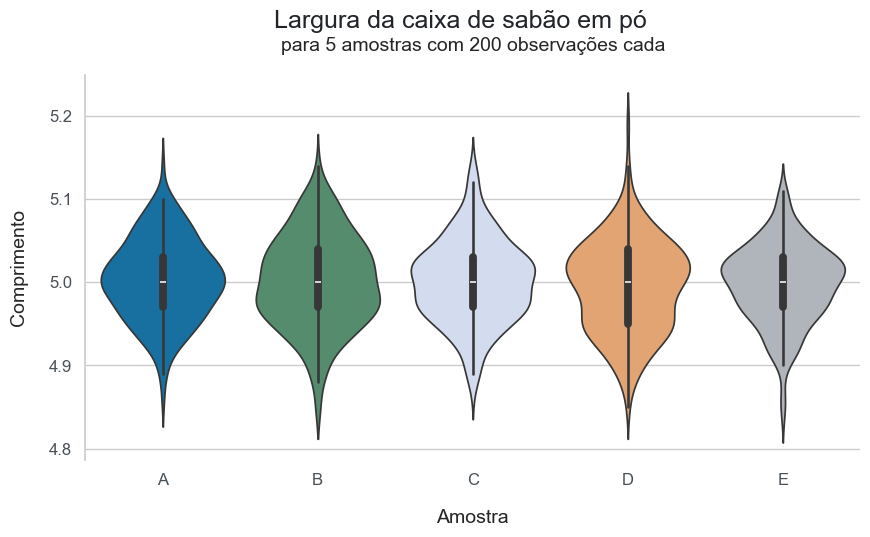

In [8]:
# Violin plot: junção do diagrama de caixa e do histograma

sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.violinplot(data=df_medidas, x='amostra', y='largura', hue='amostra',
                    palette=[AZUL2, VERDE1, AZUL5, LARANJA1, CINZA3])

plt.suptitle('Largura da caixa de sabão em pó', size=18, color=CINZA1, y=1.01)

plt.title('para 5 amostras com 200 observações cada', size=14, y=1.04)
ax.set_xlabel('Amostra', fontsize=14, labelpad=15)
ax.set_ylabel('Comprimento', fontsize=14, labelpad=15)
ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
sns.despine(bottom=True)

plt.show()

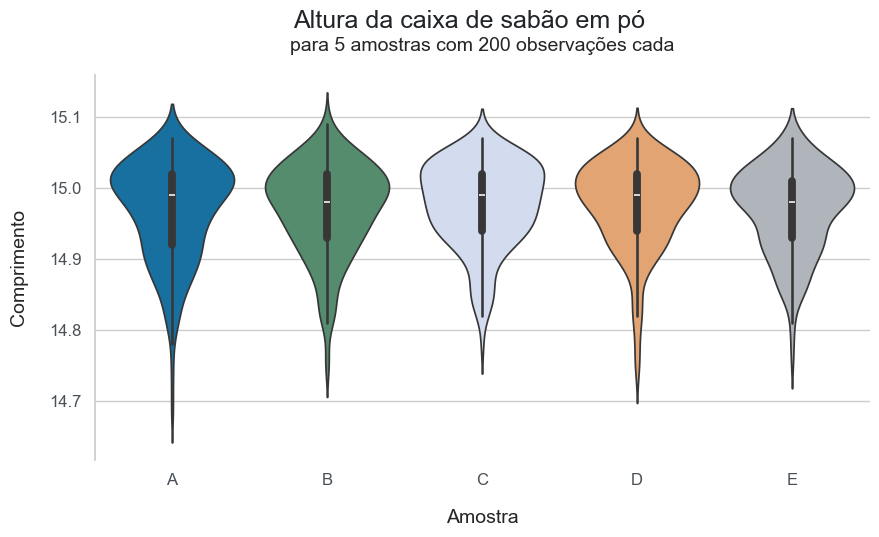

In [9]:
# Violin plot: junção do diagrama de caixa e do histograma

sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.violinplot(data=df_medidas, x='amostra', y='altura', hue='amostra',
                    palette=[AZUL2, VERDE1, AZUL5, LARANJA1, CINZA3])

plt.suptitle('Altura da caixa de sabão em pó', size=18, color=CINZA1, y=1.01)
plt.title('para 5 amostras com 200 observações cada', size=14, y=1.04)
ax.set_xlabel('Amostra', fontsize=14, labelpad=15)
ax.set_ylabel('Comprimento', fontsize=14, labelpad=15)
ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
sns.despine(bottom=True)

plt.show()  

`Pergunta`: Como estão dispostas as medidas de comprimento e altura da amostra A? Se quisermos rejeitar todos os itens em que o valor de comprimento e altura está 1% acima ou abaixo do valor de 20 e 15, respectivamente, quais seriam rejeitados?

In [10]:
df_a = df_medidas.query("amostra == 'A'")[['comprimento', 'altura']]

In [11]:
df_a.head()

,comprimento,altura
0,20.11,14.89
1,20.13,14.86
2,19.99,15.01
3,20.06,14.93
4,19.99,15.01


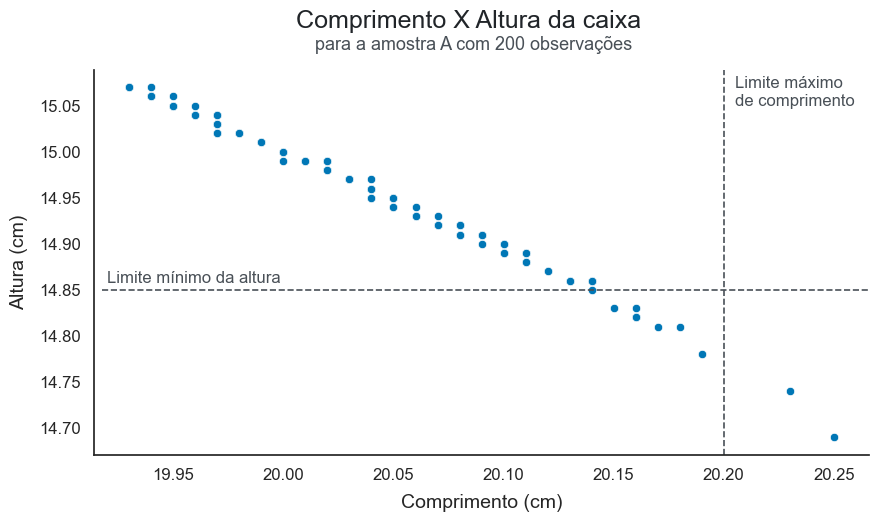

In [12]:
def grafico_dispersao(map_cores: list=[AZUL2], pct: float=0.01):
    sns.set_theme(style='white')    
    fig, ax = plt.subplots(figsize=(10, 5))

    ax = sns.scatterplot(data=df_a, x='comprimento', y='altura',
                         color=map_cores)
    
    plt.suptitle('Comprimento X Altura da caixa',
                 size=18, color=CINZA1, y=1)
    plt.title('para a amostra A com 200 observações',
              size=13, x=0.49, y=1.03, color=CINZA2)
    
    ax.set_xlabel('Comprimento (cm)', fontsize=14, labelpad=8)
    ax.set_ylabel('Altura (cm)', fontsize=14, labelpad=8)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
    sns.despine()

    ax.text(x=19.92, y=14.855,
            s='Limite mínimo da altura',
            fontsize=12, color=CINZA2, va="bottom")
    plt.axhline(y=15 * (1 - pct),
                xmin=0.01, xmax=df_a["comprimento"].max() - 0.01,
                color=CINZA2, lw=1.2, linestyle='--')
    
    ax.text(x=20.205, y=15.05, s='Limite máximo\nde comprimento',
            fontsize=12, color=CINZA2, ha="left")
    plt.axvline(x=20 * (1 + pct), color=CINZA2,
                lw=1.2, linestyle='--')

    return ax

ax = grafico_dispersao()

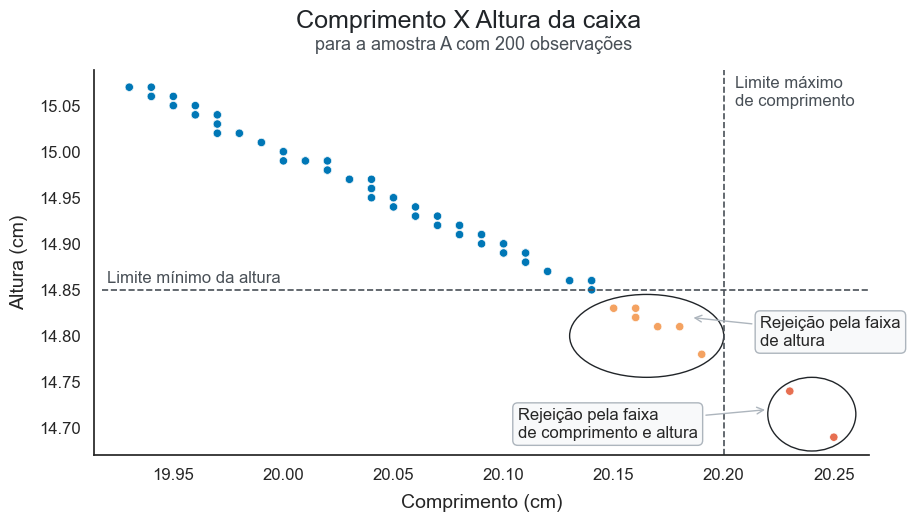

In [42]:
cores = [VERMELHO1, LARANJA1, AZUL2]
pct = 0.01


rejeita_comp = [
    True if (c > 20*(1+pct) or c < 20*(1-pct)) else False for c in df_a['comprimento']
]

rejeita_alt = [
    True if (a > 15*(1+pct) or a < 15*(1-pct)) else False for a in df_a['altura']
]

map_cores = np.where(rejeita_comp, cores[0], np.where(rejeita_alt, cores[1], cores[2]))

ax = grafico_dispersao(map_cores=map_cores, pct=pct)

rej_comp = Ellipse((20.165, 14.80), width=0.07, height=0.09,
                   color=CINZA1, fill=False)
rej_alt = Ellipse((20.24, 14.715), width=0.04, height=0.08,
                  color=CINZA1, fill=False)
ax.add_patch(rej_comp)
ax.add_patch(rej_alt)

ax.annotate('Rejeição pela faixa\nde altura',
            xy=(20.185, 14.82), xycoords='data',
            xytext=(50, -20), textcoords='offset points',
            bbox=dict(boxstyle='round', fc=CINZA5, ec=CINZA3),
            arrowprops=dict(arrowstyle='->', color=CINZA3))

ax.annotate('Rejeição pela faixa\nde comprimento e altura',
            xy=(20.22, 14.72), xycoords='data',
            xytext=(-180, -20), textcoords='offset points',
            bbox=dict(boxstyle='round', fc=CINZA5, ec=CINZA3),
            arrowprops=dict(arrowstyle='->', color=CINZA3))

fig = ax.get_figure()